In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import proplot as plot

In [72]:
# Plotting
plot.rc['figure.facecolor'] = 'white'
plot.rc['cycle'] = 'default'
plot.rc['style'] = None # https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plot.rc['savefig.dpi'] = 'figure' # proplot default is 1200, which makes inline animations appear huge
dpi = 500

In [73]:
cost_lists = np.load('_output/data/cost_lists.npy')
costs = {'lsq': cost_lists[0], 'rba': cost_lists[1]}

matched_params_lists = np.load('_output/data/matched_params_lists.npy')
matched_params = {'lsq': matched_params_lists[0], 'rba': matched_params_lists[1]}

perveances = np.load('_output/data/perveances.npy')

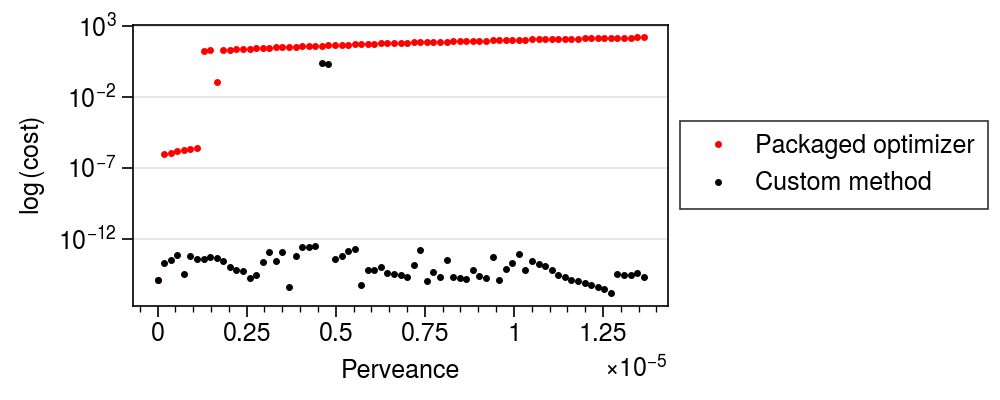

In [80]:
fig, ax = plot.subplots(figsize=(5, 2))
start = 0
s = 3
g1 = ax.plot(perveances[start:], costs['lsq'][start:], '.', color='r', ms=s)
g2 = ax.plot(perveances[start:], costs['rba'][start:], '.', color='k', ms=s)
ax.format(xlabel='Perveance', ylabel=r'$log\,(cost)$', yscale='log', yformatter='log')
ax.grid(axis='x')
ax.legend([g1, g2], labels=['Packaged optimizer', 'Custom method'], ncols=1, loc='r')
plt.savefig('_output/figures/costfunc.png')

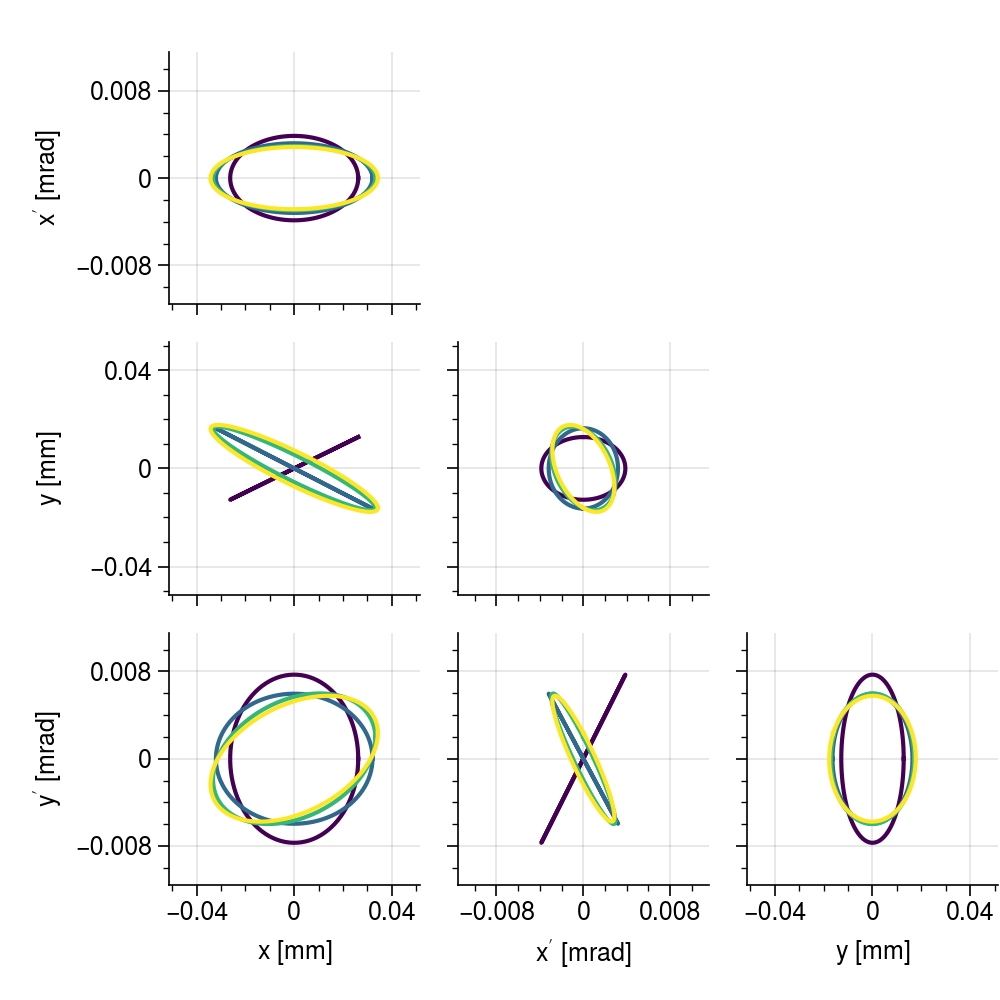

In [75]:
n = len(perveances)
idx = list(range(0, n, 20))

myplt.corner_env(matched_params['rba'][idx], cmap=plot.Colormap('viridis'));